<div style="text-align: center; font-size: 20px;">
    Uber Data Analytics 🚗
</div>

In [241]:
import pandas as pd
import numpy as np


<div style="text-align: center; font-size:20px;"> 
   Load dataset from Data Source: 

   https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page 
</div>


In [242]:
#load trip data fro Nov 2024
paraquet_file = r'/Users/adityakadam/Desktop/Python_Repository/uber_data_analytics/yellow_tripdata_2024-11.parquet' 

# engine='auto' means use the option specified in io.parquet.engine25. 
# The default behavior is to try 'pyarrow' first, and if it's unavailable, fall back to 'fastparquet'
df = pd.read_parquet(paraquet_file,engine='auto') 


In [243]:
print(pd.io.parquet.get_engine('auto'))

In [244]:
df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-11-01 00:46:24,2024-11-01 00:57:17,1.0,1.93,1.0,N,239,262,2,-12.8,-1.0,-0.5,0.00,0.0,-1.0,-17.80,-2.5,0.0
1,2,2024-11-01 00:46:24,2024-11-01 00:57:17,1.0,1.93,1.0,N,239,263,2,12.8,1.0,0.5,0.00,0.0,1.0,17.80,2.5,0.0
2,1,2024-11-01 00:37:36,2024-11-01 01:28:36,1.0,34.30,5.0,N,219,265,1,259.0,0.0,0.0,15.00,0.0,1.0,275.00,0.0,0.0
3,2,2024-11-01 00:12:55,2024-11-01 00:22:17,2.0,0.93,1.0,N,186,107,1,10.0,1.0,0.5,1.00,0.0,1.0,16.00,2.5,0.0
4,2,2024-11-01 00:54:45,2024-11-01 00:59:47,1.0,0.38,1.0,N,79,79,1,6.5,1.0,0.5,1.00,0.0,1.0,12.50,2.5,0.0
5,2,2024-11-01 00:19:00,2024-11-01 00:21:28,1.0,0.48,1.0,N,237,236,2,5.1,1.0,0.5,0.00,0.0,1.0,10.10,2.5,0.0
6,2,2024-11-01 00:42:45,2024-11-01 00:56:23,2.0,2.61,1.0,N,43,116,1,14.9,1.0,0.5,3.00,0.0,1.0,20.40,0.0,0.0
7,2,2024-11-01 00:30:10,2024-11-01 00:37:28,1.0,2.52,1.0,N,239,41,1,12.1,1.0,0.5,3.42,0.0,1.0,20.52,2.5,0.0
8,2,2024-11-01 00:44:14,2024-11-01 00:49:12,1.0,1.12,1.0,N,166,238,1,7.9,1.0,0.5,2.08,0.0,1.0,12.48,0.0,0.0
9,2,2024-11-01 00:05:05,2024-11-01 00:13:12,2.0,0.74,1.0,N,107,234,1,8.6,1.0,0.5,2.72,0.0,1.0,16.32,2.5,0.0



<div style="text-align: center; font-size:20px;"> 
   Checking data-types 
</div>

In [245]:
#check if every datatype is proper
df.info()
df.memory_usage(deep=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646369 entries, 0 to 3646368
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

Index                          132
VendorID                  14585476
tpep_pickup_datetime      29170952
tpep_dropoff_datetime     29170952
passenger_count           29170952
trip_distance             29170952
RatecodeID                29170952
store_and_fwd_flag       172602926
PULocationID              14585476
DOLocationID              14585476
payment_type              29170952
fare_amount               29170952
extra                     29170952
mta_tax                   29170952
tip_amount                29170952
tolls_amount              29170952
improvement_surcharge     29170952
total_amount              29170952
congestion_surcharge      29170952
Airport_fee               29170952
dtype: int64

In [246]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'Y': True, 'N': False})
df['store_and_fwd_flag']= df['store_and_fwd_flag'].astype('bool')
df['store_and_fwd_flag']= df['store_and_fwd_flag'].astype('bool')

df['PULocationID']= df['PULocationID'].astype(np.int16)
df['DOLocationID']= df['DOLocationID'].astype(np.int16)

df = df.fillna(0)
column_names = ['VendorID','payment_type','passenger_count','trip_distance','RatecodeID','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','Airport_fee']
df[column_names] = np.ceil(df[column_names]).astype(np.int8)
df['tpep_pickup_datetime']=df['tpep_pickup_datetime'].astype('datetime64[s]')
df['tpep_dropoff_datetime']=df['tpep_dropoff_datetime'].astype('datetime64[s]')

df.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-11-01 00:46:24,2024-11-01 00:57:17,1,2,1,False,239,262,2,-12,-1,0,0,0,-1,-17,-2,0
1,2,2024-11-01 00:46:24,2024-11-01 00:57:17,1,2,1,False,239,263,2,13,1,1,0,0,1,18,3,0
2,1,2024-11-01 00:37:36,2024-11-01 01:28:36,1,35,5,False,219,265,1,3,0,0,15,0,1,19,0,0
3,2,2024-11-01 00:12:55,2024-11-01 00:22:17,2,1,1,False,186,107,1,10,1,1,1,0,1,16,3,0
4,2,2024-11-01 00:54:45,2024-11-01 00:59:47,1,1,1,False,79,79,1,7,1,1,1,0,1,13,3,0
5,2,2024-11-01 00:19:00,2024-11-01 00:21:28,1,1,1,False,237,236,2,6,1,1,0,0,1,11,3,0
6,2,2024-11-01 00:42:45,2024-11-01 00:56:23,2,3,1,False,43,116,1,15,1,1,3,0,1,21,0,0
7,2,2024-11-01 00:30:10,2024-11-01 00:37:28,1,3,1,False,239,41,1,13,1,1,4,0,1,21,3,0
8,2,2024-11-01 00:44:14,2024-11-01 00:49:12,1,2,1,False,166,238,1,8,1,1,3,0,1,13,0,0
9,2,2024-11-01 00:05:05,2024-11-01 00:13:12,2,1,1,False,107,234,1,9,1,1,3,0,1,17,3,0


In [247]:
#check if all values are zero, we got maximum values > 0 so wont check minimum

print(df['Airport_fee'].max())
print(df['tolls_amount'].max())

2
118


In [210]:

df.info()
df.memory_usage(deep=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646369 entries, 0 to 3646368
Data columns (total 19 columns):
 #   Column                 Dtype        
---  ------                 -----        
 0   VendorID               int8         
 1   tpep_pickup_datetime   datetime64[s]
 2   tpep_dropoff_datetime  datetime64[s]
 3   passenger_count        int8         
 4   trip_distance          int8         
 5   RatecodeID             int8         
 6   store_and_fwd_flag     bool         
 7   PULocationID           int32        
 8   DOLocationID           int32        
 9   payment_type           int8         
 10  fare_amount            int8         
 11  extra                  int8         
 12  mta_tax                int8         
 13  tip_amount             int8         
 14  tolls_amount           int8         
 15  improvement_surcharge  int8         
 16  total_amount           int8         
 17  congestion_surcharge   int8         
 18  Airport_fee            int8         
dtype

Index                         132
VendorID                  3646369
tpep_pickup_datetime     29170952
tpep_dropoff_datetime    29170952
passenger_count           3646369
trip_distance             3646369
RatecodeID                3646369
store_and_fwd_flag        3646369
PULocationID             14585476
DOLocationID             14585476
payment_type              3646369
fare_amount               3646369
extra                     3646369
mta_tax                   3646369
tip_amount                3646369
tolls_amount              3646369
improvement_surcharge     3646369
total_amount              3646369
congestion_surcharge      3646369
Airport_fee               3646369
dtype: int64

In [211]:
df.info()
df.memory_usage(deep=True).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646369 entries, 0 to 3646368
Data columns (total 19 columns):
 #   Column                 Dtype        
---  ------                 -----        
 0   VendorID               int8         
 1   tpep_pickup_datetime   datetime64[s]
 2   tpep_dropoff_datetime  datetime64[s]
 3   passenger_count        int8         
 4   trip_distance          int8         
 5   RatecodeID             int8         
 6   store_and_fwd_flag     bool         
 7   PULocationID           int32        
 8   DOLocationID           int32        
 9   payment_type           int8         
 10  fare_amount            int8         
 11  extra                  int8         
 12  mta_tax                int8         
 13  tip_amount             int8         
 14  tolls_amount           int8         
 15  improvement_surcharge  int8         
 16  total_amount           int8         
 17  congestion_surcharge   int8         
 18  Airport_fee            int8         
dtype

np.int64(142208523)

<div style="text-align: center; font-size:20px;"> 
   Display the Data Model (fact and dimension table) constructed:
   
   (we can construct it using Lucid or Draw.io)
</div>


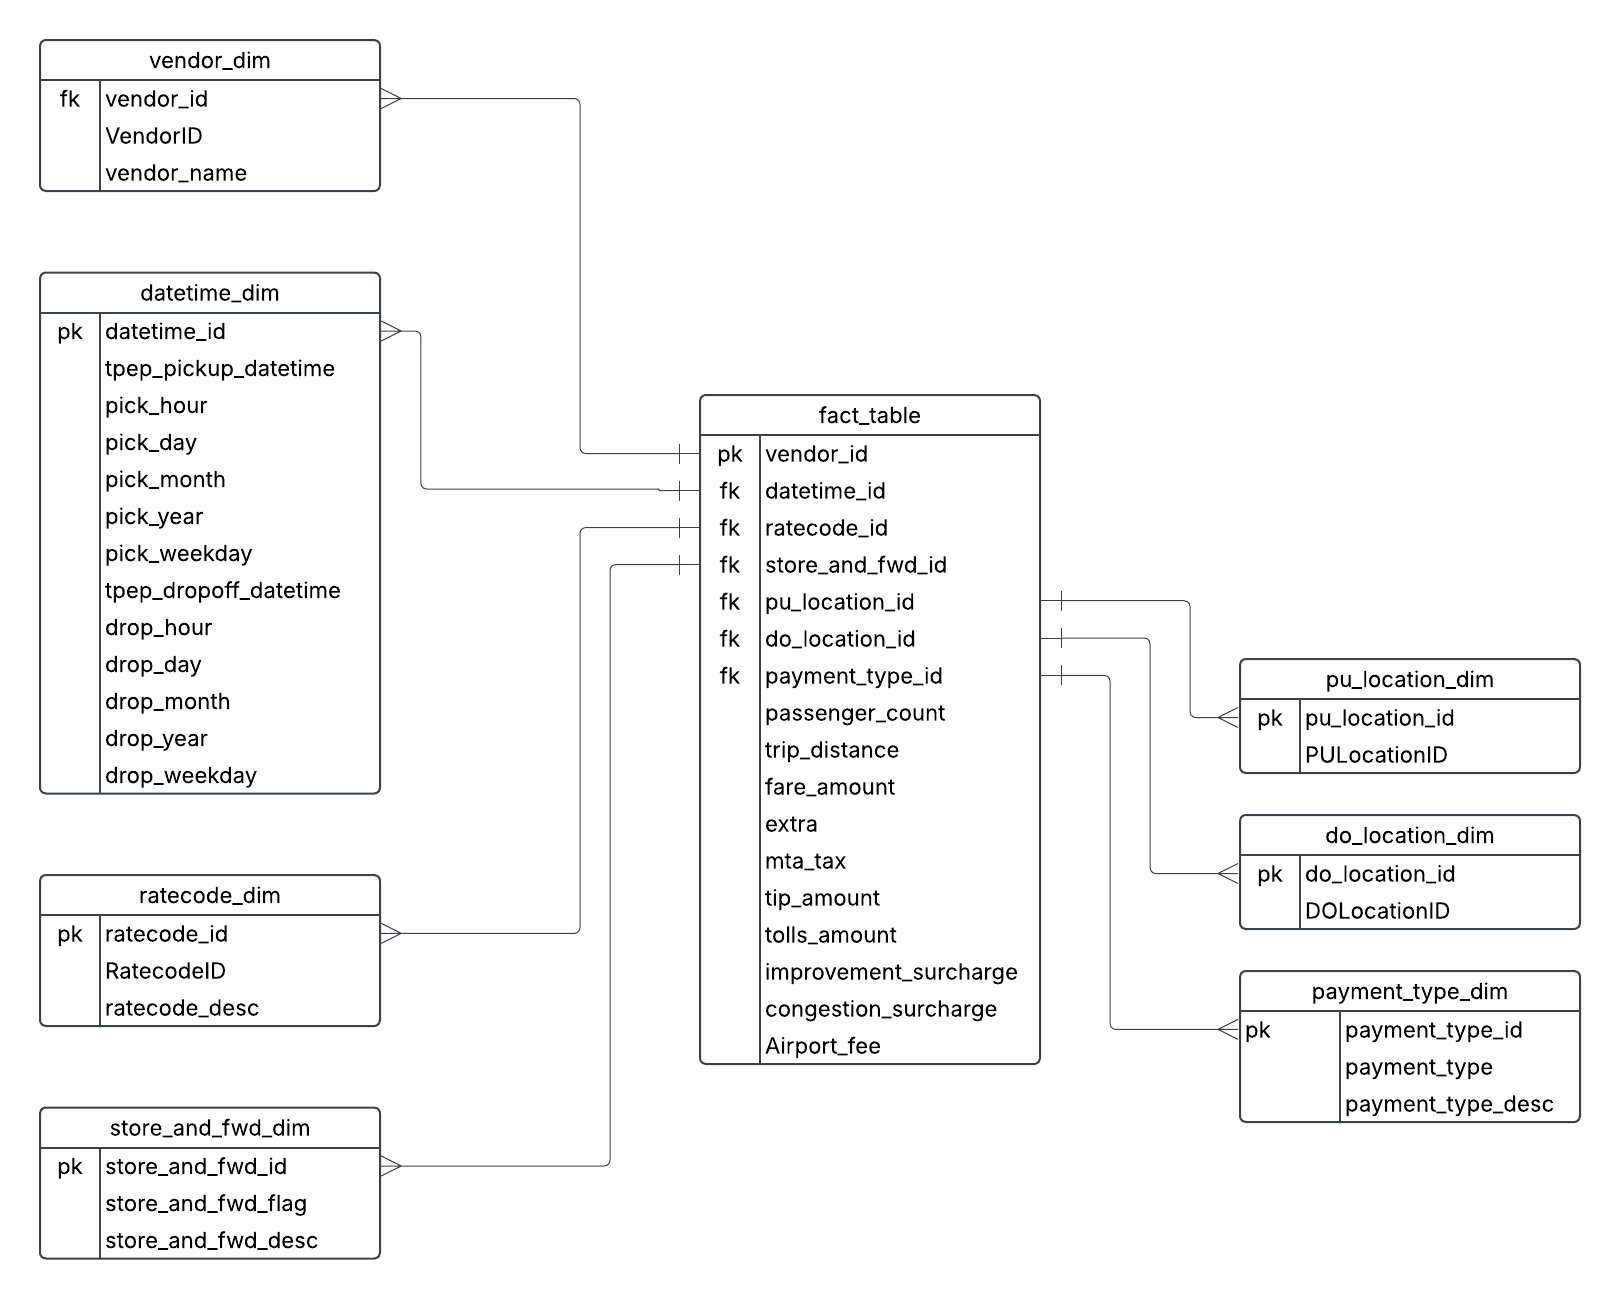

In [212]:
from PIL import Image
from IPython.display import display

# open the image
image = Image.open(r"/Users/adityakadam/Desktop/Python_Repository/uber_data_analytics/uber_data_analytics_data_model.png")

# display the image
display(image)


<div style="text-align: center; font-size: 20px;">
    Constructing the datetime_dim table
</div>

In [213]:
datetime_dim = df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].drop_duplicates().reset_index(drop=True)

datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday  

datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday  


In [214]:
datetime_dim['datetime_id'] = datetime_dim.index

datetime_dim.head(10)

,tpep_pickup_datetime,tpep_dropoff_datetime,pick_day,pick_hour,pick_month,pick_year,pick_weekday,drop_day,drop_hour,drop_month,drop_year,drop_weekday,datetime_id
0,2024-11-01 00:46:24,2024-11-01 00:57:17,1,0,11,2024,4,1,0,11,2024,4,0
1,2024-11-01 00:37:36,2024-11-01 01:28:36,1,0,11,2024,4,1,1,11,2024,4,1
2,2024-11-01 00:12:55,2024-11-01 00:22:17,1,0,11,2024,4,1,0,11,2024,4,2
3,2024-11-01 00:54:45,2024-11-01 00:59:47,1,0,11,2024,4,1,0,11,2024,4,3
4,2024-11-01 00:19:00,2024-11-01 00:21:28,1,0,11,2024,4,1,0,11,2024,4,4
5,2024-11-01 00:42:45,2024-11-01 00:56:23,1,0,11,2024,4,1,0,11,2024,4,5
6,2024-11-01 00:30:10,2024-11-01 00:37:28,1,0,11,2024,4,1,0,11,2024,4,6
7,2024-11-01 00:44:14,2024-11-01 00:49:12,1,0,11,2024,4,1,0,11,2024,4,7
8,2024-11-01 00:05:05,2024-11-01 00:13:12,1,0,11,2024,4,1,0,11,2024,4,8
9,2024-11-01 00:46:00,2024-11-01 01:13:00,1,0,11,2024,4,1,1,11,2024,4,9


In [215]:
print('Reduce Memory \n')
columns_date = ['pick_day','pick_hour','pick_month','pick_weekday','drop_day','drop_hour','drop_month','drop_weekday','datetime_id']
datetime_dim[columns_date]=np.ceil(datetime_dim[columns_date]).astype(np.int8)
datetime_dim['pick_year']=datetime_dim['pick_year'].astype(np.int16)
datetime_dim['drop_year']=datetime_dim['drop_year'].astype(np.int16)

datetime_dim.info()

Reduce Memory 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583765 entries, 0 to 3583764
Data columns (total 13 columns):
 #   Column                 Dtype        
---  ------                 -----        
 0   tpep_pickup_datetime   datetime64[s]
 1   tpep_dropoff_datetime  datetime64[s]
 2   pick_day               int8         
 3   pick_hour              int8         
 4   pick_month             int8         
 5   pick_year              int16        
 6   pick_weekday           int8         
 7   drop_day               int8         
 8   drop_hour              int8         
 9   drop_month             int8         
 10  drop_year              int16        
 11  drop_weekday           int8         
 12  datetime_id            int8         
dtypes: datetime64[s](2), int16(2), int8(9)
memory usage: 99.1 MB


<div style= 'text-align: center; font-size:20px'>
  Reorder according to the datamodel
</div>

In [216]:
datetime_dim = datetime_dim[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day', 'pick_month', 'pick_year',
'pick_weekday', 'tpep_dropoff_datetime','drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]
datetime_dim

,datetime_id,tpep_pickup_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,tpep_dropoff_datetime,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2024-11-01 00:46:24,0,1,11,2024,4,2024-11-01 00:57:17,0,1,11,2024,4
1,1,2024-11-01 00:37:36,0,1,11,2024,4,2024-11-01 01:28:36,1,1,11,2024,4
2,2,2024-11-01 00:12:55,0,1,11,2024,4,2024-11-01 00:22:17,0,1,11,2024,4
3,3,2024-11-01 00:54:45,0,1,11,2024,4,2024-11-01 00:59:47,0,1,11,2024,4
4,4,2024-11-01 00:19:00,0,1,11,2024,4,2024-11-01 00:21:28,0,1,11,2024,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3583760,16,2024-11-30 23:11:15,23,30,11,2024,5,2024-11-30 23:19:33,23,30,11,2024,5
3583761,17,2024-11-30 23:49:30,23,30,11,2024,5,2024-12-01 00:27:39,0,1,12,2024,6
3583762,18,2024-11-30 23:31:46,23,30,11,2024,5,2024-12-01 00:04:32,0,1,12,2024,6
3583763,19,2024-11-30 23:41:21,23,30,11,2024,5,2024-11-30 23:53:20,23,30,11,2024,5


In [217]:
datetime_dim.info()
print("Total Memory Usage is: ", datetime_dim.memory_usage(deep=True).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3583765 entries, 0 to 3583764
Data columns (total 13 columns):
 #   Column                 Dtype        
---  ------                 -----        
 0   datetime_id            int8         
 1   tpep_pickup_datetime   datetime64[s]
 2   pick_hour              int8         
 3   pick_day               int8         
 4   pick_month             int8         
 5   pick_year              int16        
 6   pick_weekday           int8         
 7   tpep_dropoff_datetime  datetime64[s]
 8   drop_hour              int8         
 9   drop_day               int8         
 10  drop_month             int8         
 11  drop_year              int16        
 12  drop_weekday           int8         
dtypes: datetime64[s](2), int16(2), int8(9)
memory usage: 99.1 MB
Total Memory Usage is:  103929317


<div style="text-align: center; font-size: 20px;">
    Constructing the ratecode_dim table
</div>

In [218]:
import pandas as pd
import numpy as np

# Step 1: Define the ratecode_data dictionary
# ratecode_data = ['Standard rate','JFK','Newark','Nassau or Westchester','Negotiated fare','Group ride']
ratecode_data = {
    1 :'Standard rate',
    2 :'JFK',
    3 :'Newark',
    4 :'Nassau or Westchester',
    5 :'Negotiated fare',
    6 :'Group ride'
}
ratecode_dim = pd.DataFrame(ratecode_data.items(),columns=['ratecode_id','ratecode_desc'])

ratecodeID = pd.DataFrame(df['RatecodeID'].unique(),columns=['RatecodeID']).sort_values(by='RatecodeID', ascending=True).reset_index(drop=True)                      

ratecode_dim = pd.merge(
    ratecode_dim.reset_index(), 
    ratecodeID.reset_index(), 
    how='inner', 
    on='index'
).set_index('index')

ratecode_dim

,ratecode_id,ratecode_desc,RatecodeID
index,,,
0,1,Standard rate,0
1,2,JFK,1
2,3,Newark,2
3,4,Nassau or Westchester,3
4,5,Negotiated fare,4
5,6,Group ride,5


In [219]:
ratecode_dim.info()
print("Total Memory Usage is: ", ratecode_dim.memory_usage(deep=True).sum())

ratecode_dim['ratecode_id']=ratecode_dim['ratecode_id'].astype(np.int8)
ratecode_dim['RatecodeID']=ratecode_dim['RatecodeID'].astype(np.int8)

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ratecode_id    6 non-null      int64 
 1   ratecode_desc  6 non-null      object
 2   RatecodeID     6 non-null      int8  
dtypes: int64(1), int8(1), object(1)
memory usage: 150.0+ bytes
Total Memory Usage is:  464


In [220]:
ratecode_dim.info()
print("Total Memory Usage is: ", ratecode_dim.memory_usage(deep=True).sum())


<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ratecode_id    6 non-null      int8  
 1   ratecode_desc  6 non-null      object
 2   RatecodeID     6 non-null      int8  
dtypes: int8(2), object(1)
memory usage: 108.0+ bytes
Total Memory Usage is:  422


In [221]:
ratecode_dim

,ratecode_id,ratecode_desc,RatecodeID
index,,,
0,1,Standard rate,0
1,2,JFK,1
2,3,Newark,2
3,4,Nassau or Westchester,3
4,5,Negotiated fare,4
5,6,Group ride,5


<div style= 'text-align: center; font-size:20px'>
  Reorder according to the datamodel
</div>

In [222]:
ratecode_dim = ratecode_dim[['ratecode_id','RatecodeID','ratecode_desc']]
ratecode_dim

,ratecode_id,RatecodeID,ratecode_desc
index,,,
0,1,0,Standard rate
1,2,1,JFK
2,3,2,Newark
3,4,3,Nassau or Westchester
4,5,4,Negotiated fare
5,6,5,Group ride


<div style="text-align: center; font-size: 20px;">
    Constructing the store_and_fwd_dim table
</div>

In [223]:
store_and_fwd_data = {
True : 'store and forward trip',
False : 'not a store and forward trip'
}

store_and_fwd_dim = pd.DataFrame(list(store_and_fwd_data.items()),columns=['store_and_fwd_flag','store_and_fwd_desc'])
store_and_fwd_dim['store_and_fwd_id'] = store_and_fwd_dim.index.astype(np.int8)
store_and_fwd_dim

,store_and_fwd_flag,store_and_fwd_desc,store_and_fwd_id
0,True,store and forward trip,0
1,False,not a store and forward trip,1


In [224]:
store_and_fwd_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   store_and_fwd_flag  2 non-null      bool  
 1   store_and_fwd_desc  2 non-null      object
 2   store_and_fwd_id    2 non-null      int8  
dtypes: bool(1), int8(1), object(1)
memory usage: 152.0+ bytes


<div style= 'text-align: center; font-size:20px'>
  Reorder according to the datamodel
</div>

In [225]:
store_and_fwd_dim = store_and_fwd_dim[['store_and_fwd_id','store_and_fwd_flag','store_and_fwd_desc']]
store_and_fwd_dim

,store_and_fwd_id,store_and_fwd_flag,store_and_fwd_desc
0,0,True,store and forward trip
1,1,False,not a store and forward trip


<div style="text-align: center; font-size: 20px;">
    Constructing the payment_type_dim table
</div>

In [226]:
payment_type_data = {
 1: 'Credit card',
 2: 'Cash',
 3: 'No charge',
 4: 'Dispute',
 5: 'Unknown',
 6: 'Voided trip'
} 

payment_type_dim = pd.DataFrame(payment_type_data.items(),columns=['payment_type','paymemt_desc'])
payment_type_dim['payment_type_id'] = (payment_type_dim.index+1).astype(np.int8)
payment_type_dim

,payment_type,paymemt_desc,payment_type_id
0,1,Credit card,1
1,2,Cash,2
2,3,No charge,3
3,4,Dispute,4
4,5,Unknown,5
5,6,Voided trip,6


In [227]:
payment_type_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   payment_type     6 non-null      int64 
 1   paymemt_desc     6 non-null      object
 2   payment_type_id  6 non-null      int8  
dtypes: int64(1), int8(1), object(1)
memory usage: 234.0+ bytes


In [228]:
payment_type_dim['payment_type'] = payment_type_dim['payment_type'].astype(np.int8)
payment_type_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   payment_type     6 non-null      int8  
 1   paymemt_desc     6 non-null      object
 2   payment_type_id  6 non-null      int8  
dtypes: int8(2), object(1)
memory usage: 192.0+ bytes


<div style= 'text-align: center; font-size:20px'>
  Reorder according to the datamodel
</div>

In [229]:
payment_type_dim = payment_type_dim[['payment_type_id','payment_type','paymemt_desc']]
payment_type_dim

,payment_type_id,payment_type,paymemt_desc
0,1,1,Credit card
1,2,2,Cash
2,3,3,No charge
3,4,4,Dispute
4,5,5,Unknown
5,6,6,Voided trip


<div style="text-align: center; font-size: 20px;">
    Constructing the pu_location_dim table
</div>

In [230]:
pu_location_dim = pd.DataFrame()
pu_location_dim['PULocationID'] = df['PULocationID'].drop_duplicates().reset_index(drop=True).astype(np.int16)
pu_location_dim['pu_location_id'] = pu_location_dim.index.astype(np.int16)
pu_location_dim

,PULocationID,pu_location_id
0,239,0
1,219,1
2,186,2
3,79,3
4,237,4
...,...,...
255,156,255
256,5,256
257,251,257
258,115,258


In [231]:
pu_location_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   PULocationID    260 non-null    int16
 1   pu_location_id  260 non-null    int16
dtypes: int16(2)
memory usage: 1.1 KB


<div style= 'text-align: center; font-size:20px'>
  Reorder according to the datamodel
</div>

In [232]:
pu_location_dim = pu_location_dim[['pu_location_id','PULocationID']]
pu_location_dim

,pu_location_id,PULocationID
0,0,239
1,1,219
2,2,186
3,3,79
4,4,237
...,...,...
255,255,156
256,256,5
257,257,251
258,258,115


<div style="text-align: center; font-size: 20px;">
    Constructing the du_location_dim table
</div>

In [233]:
do_location_dim = pd.DataFrame()
do_location_dim['DOLocationID'] = df['DOLocationID'].drop_duplicates().reset_index(drop=True).astype(np.int16)
do_location_dim['do_location_id'] = do_location_dim.index.astype(np.int16)
do_location_dim

,DOLocationID,do_location_id
0,262,0
1,263,1
2,265,2
3,107,3
4,79,4
...,...,...
255,30,255
256,105,256
257,204,257
258,5,258


<div style= 'text-align: center; font-size:20px'>
  Reorder according to the datamodel
</div>

In [234]:
do_location_dim = do_location_dim[['do_location_id','DOLocationID']]
do_location_dim

,do_location_id,DOLocationID
0,0,262
1,1,263
2,2,265
3,3,107
4,4,79
...,...,...
255,255,30
256,256,105
257,257,204
258,258,5


<div style="text-align: center; font-size: 20px;">
    Constructing the vendor_dim table
</div>

In [235]:
vendor_data={
    1:'Creative Mobile Technologies, LLC',
    2:'VeriFone Inc'
}

vendor_dim = pd.DataFrame(list(vendor_data.items()),columns=['vendor_id','vendor_name'])
vendor_dim['VendorID'] = df[['VendorID']].drop_duplicates().reset_index(drop=True).astype(np.int8)
vendor_dim['vendor_id'] = vendor_dim['vendor_id'].astype(np.int8)
vendor_dim
 

,vendor_id,vendor_name,VendorID
0,1,"Creative Mobile Technologies, LLC",2
1,2,VeriFone Inc,1


In [236]:
vendor_dim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   vendor_id    2 non-null      int8  
 1   vendor_name  2 non-null      object
 2   VendorID     2 non-null      int8  
dtypes: int8(2), object(1)
memory usage: 152.0+ bytes


<div style= 'text-align: center; font-size:20px'>
  Reorder according to the datamodel
</div>


In [237]:
vendor_dim = vendor_dim[['vendor_id', 'VendorID', 'vendor_name']]
vendor_dim

,vendor_id,VendorID,vendor_name
0,1,2,"Creative Mobile Technologies, LLC"
1,2,1,VeriFone Inc


<div style="text-align: center; font-size: 20px;">
    Constructing the fact_table table
</div>

In [238]:
fact_table = df.merge(datetime_dim,on=['tpep_pickup_datetime','tpep_dropoff_datetime']) \
             .merge(ratecode_dim,on='RatecodeID') \
             .merge(pu_location_dim,on='PULocationID') \
             .merge(do_location_dim,on='DOLocationID') \
             .merge(payment_type_dim,on='payment_type') \
             .merge(store_and_fwd_dim,on='store_and_fwd_flag') \
             .merge(vendor_dim,on='VendorID')\
             [['vendor_id','datetime_id','ratecode_id','store_and_fwd_id',
               'pu_location_id','do_location_id','payment_type_id','passenger_count',
               'trip_distance','fare_amount','extra','mta_tax','tip_amount',
               'tolls_amount','improvement_surcharge','congestion_surcharge','Airport_fee'
             ]]
fact_table.head(10)

,vendor_id,datetime_id,ratecode_id,store_and_fwd_id,pu_location_id,do_location_id,payment_type_id,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,0,2,1,0,0,2,1,2,-12,-1,0,0,0,-1,-2,0
1,1,0,2,1,0,1,2,1,2,13,1,1,0,0,1,3,0
2,2,1,6,1,1,2,1,1,35,3,0,0,15,0,1,0,0
3,1,2,2,1,2,3,1,2,1,10,1,1,1,0,1,3,0
4,1,3,2,1,3,4,1,1,1,7,1,1,1,0,1,3,0
5,1,4,2,1,4,5,2,1,1,6,1,1,0,0,1,3,0
6,1,5,2,1,5,6,1,2,3,15,1,1,3,0,1,0,0
7,1,6,2,1,0,7,1,1,3,13,1,1,4,0,1,3,0
8,1,7,2,1,6,8,1,1,2,8,1,1,3,0,1,0,0
9,1,8,2,1,7,9,1,2,1,9,1,1,3,0,1,3,0


In [239]:
fact_table.info()
fact_table.memory_usage()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3230260 entries, 0 to 3230259
Data columns (total 17 columns):
 #   Column                 Dtype
---  ------                 -----
 0   vendor_id              int8 
 1   datetime_id            int8 
 2   ratecode_id            int8 
 3   store_and_fwd_id       int8 
 4   pu_location_id         int16
 5   do_location_id         int16
 6   payment_type_id        int8 
 7   passenger_count        int8 
 8   trip_distance          int8 
 9   fare_amount            int8 
 10  extra                  int8 
 11  mta_tax                int8 
 12  tip_amount             int8 
 13  tolls_amount           int8 
 14  improvement_surcharge  int8 
 15  congestion_surcharge   int8 
 16  Airport_fee            int8 
dtypes: int16(2), int8(15)
memory usage: 58.5 MB


Index                        132
vendor_id                3230260
datetime_id              3230260
ratecode_id              3230260
store_and_fwd_id         3230260
pu_location_id           6460520
do_location_id           6460520
payment_type_id          3230260
passenger_count          3230260
trip_distance            3230260
fare_amount              3230260
extra                    3230260
mta_tax                  3230260
tip_amount               3230260
tolls_amount             3230260
improvement_surcharge    3230260
congestion_surcharge     3230260
Airport_fee              3230260
dtype: int64